# Linear Regression practical example

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading Data

In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all') # without include='all', only the stats for numerical data will be shown

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

data = raw_data.drop(['Model'], axis=1) #axis 1 is for column and axis 0 is for row
data.describe(include='all')

### Dealing with missing values

In [5]:
 raw_data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [6]:
 raw_data.isnull().sum() #will sum all the missing values and give us the number of null observations

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

NB: if you are removing <5% of the observations. you are free to just remove all that hvae missing values 

In [7]:
data_no_mv =  raw_data.dropna(axis=0) #dropna is used to drop observations with missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\2156581670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price']) #the probability distribution function of price


<Axes: xlabel='Price', ylabel='Density'>

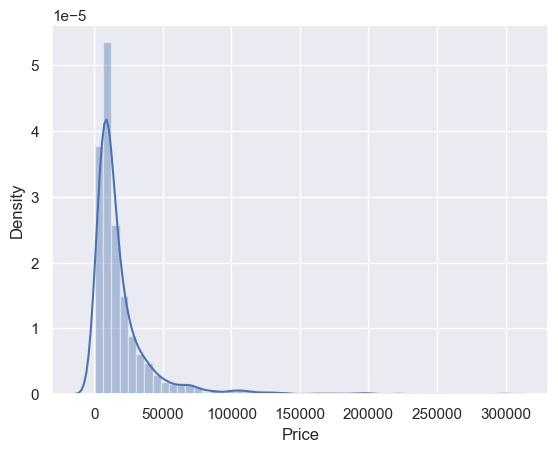

In [8]:
sns.distplot(data_no_mv['Price']) #the probability distribution function of price

Ideally we are looking for a normal distribution, from the chart and discribtive stats we can see that price has some outliers.
one way to deal with outliers seemlessly is to remove top 1% of observations. One way to do this is using the Quantile method. DataFrame.quantile(the quantile) returns the value the given quantile (=np.percenttile); it takes values from 0 to 1. if you enter 0.25, it will take the 25th percentile.
We want to get the 99th percentile and keep the data below it

### Dealing with outliers

In [10]:
q = data_no_mv['Price'].quantile(0.99) # this returns a single value
data_1 = data_no_mv[data_no_mv['Price']<q] # returns all data with price less than the 99th percentile
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

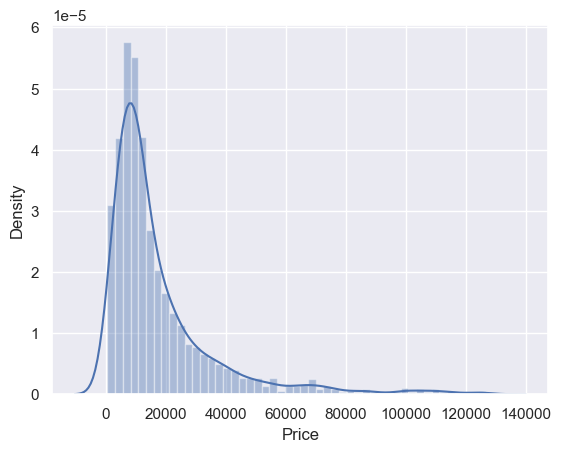

In [11]:
sns.distplot(data_1['Price'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\1547815769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

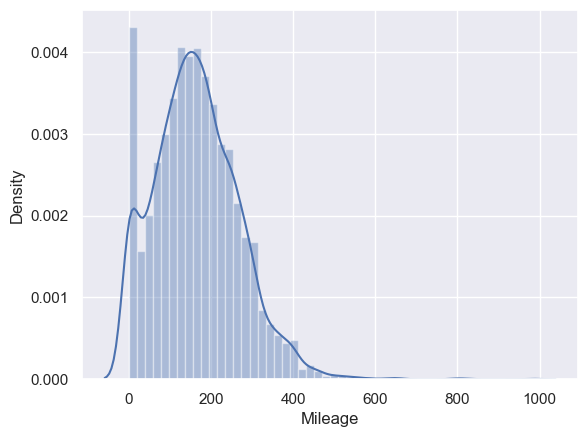

In [12]:
sns.distplot(data_1['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

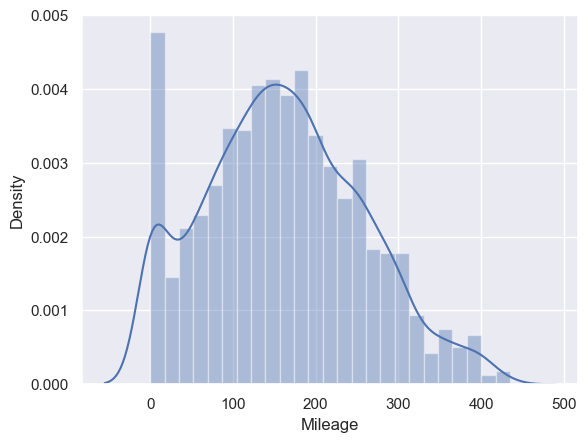

In [14]:
sns.distplot(data_2['Mileage'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\2389813043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

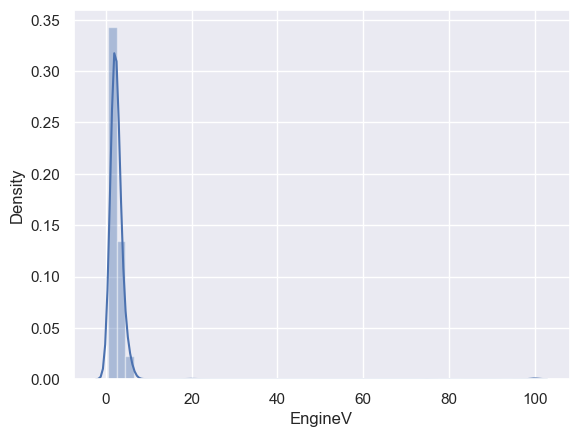

In [15]:
sns.distplot(data_2['EngineV'])

In [16]:
data_3 = data_2[data_2['EngineV']<6.5] # from research online 6.5 is the max engine value

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

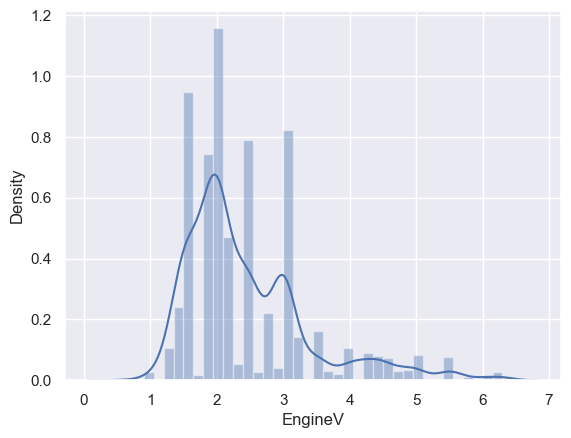

In [17]:
sns.distplot(data_3['EngineV'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

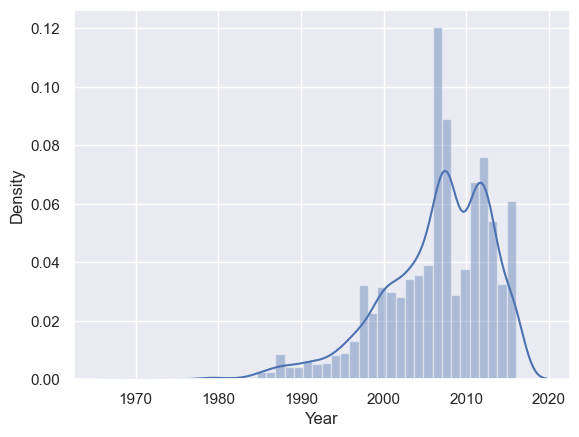

In [18]:
sns.distplot(data_3['Year'])

As we can see from the image above, we have more of outliers to the left, so we want to keep values greater than the 1th percentile

In [19]:
q=data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

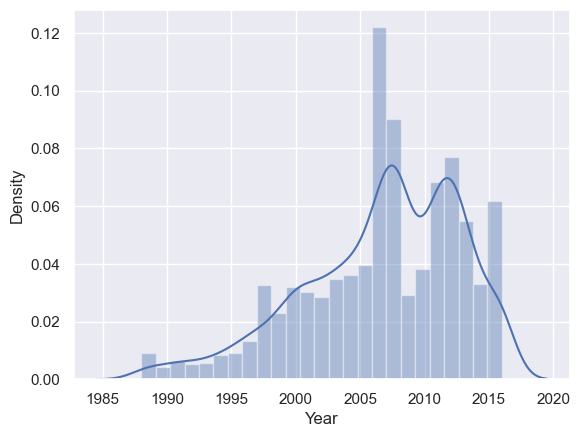

In [20]:
sns.distplot(data_4['Year'])

In [21]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [22]:
#from the data printed above, we can see that the index is not orderly, so we have to reset the index using reset_index method
data_cleaned = data_4.reset_index(drop=True) # drop=True makes it to totally forget about the old index

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking the OLS assumptons

In [34]:
# when checking assumptioins we don't have to worry abt the categorical values
# we will be focused on price, year, enginev and mileage


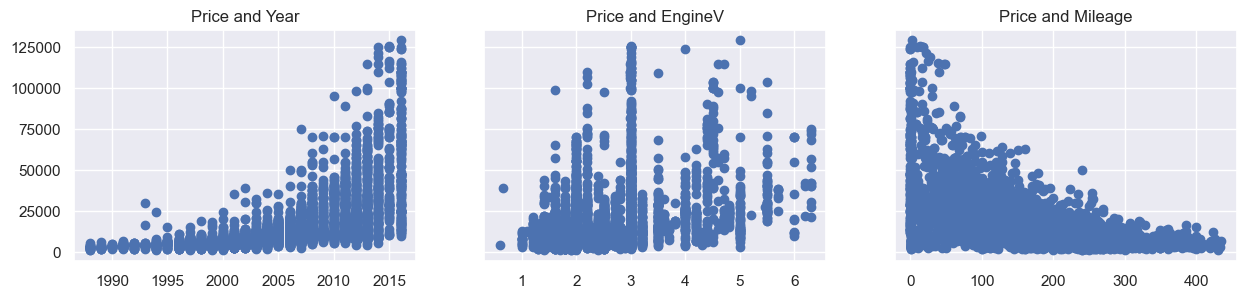

In [24]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

#### As we can see, none of the relationship is linear, so we need to perform transformation, one posible transformation is the Log transformation which are especially useful when facing exponential relationships.
We will transform price

### Relaxing the assumptions

In [25]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


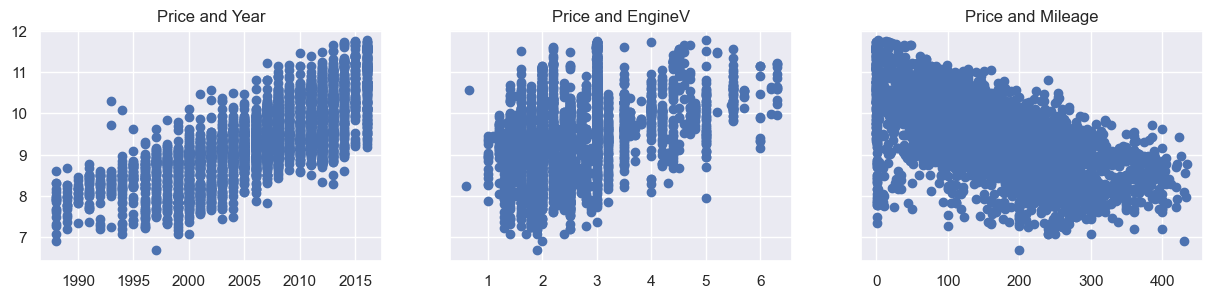

In [26]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [28]:
# we drop the original price variable since its no longer needed
data_cleaned = data_cleaned.drop(['Price'], axis=1)
# 1. the above takes care of Linearity.
# 2. No endogeneity of regressors is assumed to hold, we will see more after our regression
# 3. Normaility and homoscedesticity holds since we've already performed log transfromation
# 4. Since there isn'time series data, we assume that no autocorrelation holds
# 5. it is logical that 'Year' and 'Mileage' will be correlated

### Multicollinearity

In [29]:
# sklearn does not have a dedicated method to check this assumption, so we will use statsmodels
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [31]:
# one of the ways to check for multicollinearity is through VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [32]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF E [1, +inf)
if VIF=1:no multicolinearity
if 1<VIF<5: perfectly okay
if VIF>10: unacceptable, there's no standard cuttoff for this set, some use 5, 6 etc

In [33]:
# From our case it seems year is too correlated with the other variables, so we will remove year
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Creating dummy variables

pd.get_dummies(df[,drop_first]) spots all categorical variables and creates dummies automatically. 
Note: if we have N categories for a feature, we have to create N-1 dummies.
if we create a separate dummy variable for each category, we will introduce multicollinearity to the regression


In [34]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) 
#drop_first here makes sure we don't create a dummy for the first categorical variable

In [35]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rearrange abit

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [37]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [38]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression model

### Declare the inputs and the targets

In [39]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [41]:
inputs_scaled = scaler.transform(inputs)

We've standardized all the input variables
NB: note that it is not usually recommended to standardize dummy variables,
For ML purposes, scaling has no effect on the predictive power of dummies, once scaled, though, they lose their dummy meaning

### Train Test split

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [43]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

The above was enough to create our linear regression model, infact the log-linear regression as the dependent variable is the log of price. A simple way to check the final results is to plot the predicted values against the observed values, and observe if it fits a 45 degree line

In [48]:
y_hat = reg.predict(x_train)

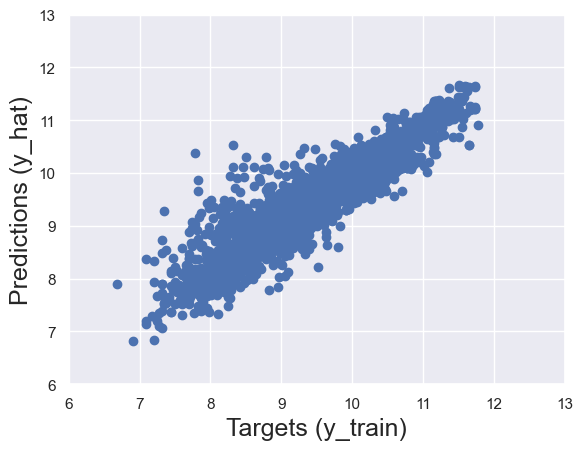

In [49]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Another popular check is the residual plot. Residual = Difference btw the targets and the predictions. A residual plot refers to the distribution of the residuals

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\3979712437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

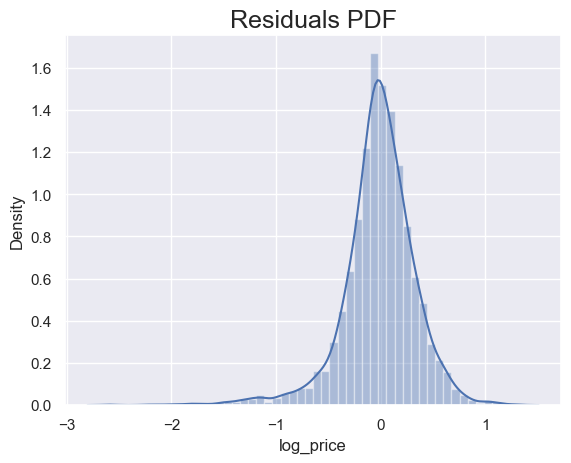

In [50]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [51]:
reg.score(x_train, y_train)

0.8396423380071112

### finding the weights and bias

In [52]:
reg.intercept_

708260499309.9775

In [53]:
reg.coef_

array([-3.61100869e-01,  3.29167982e-02,  4.46791566e+11,  4.81429244e+11,
        2.21612351e+12, -2.58872992e+11,  5.18908618e+10, -3.08959240e+12,
       -5.83978683e-02, -1.28250122e-02, -6.57901764e-02, -5.37719727e-02,
       -2.19116211e-02, -1.02050781e-01, -2.74047852e-02, -1.21215820e-01,
        3.13781738e-01,  7.54966996e+10, -7.40348961e+12,  4.08020020e-02,
        4.34417725e-02, -1.02310181e-02,  4.62980358e+10,  1.55029297e-02,
        1.47323608e-02,  1.68457031e-02,  2.26135254e-02,  1.05590820e-02,
        3.27418899e+10,  1.10931396e-02, -3.58581543e-03,  2.03552246e-02,
        6.06994629e-02,  1.18927002e-01, -2.53852643e+11,  2.83660889e-02,
        3.73458862e-02,  5.40161133e-02, -3.78337539e+11,  2.59552002e-02,
        3.04260254e-02,  4.75887076e+12,  2.77099609e-02,  4.65545654e-02,
        1.70883179e-01,  5.44738770e-02,  8.05244523e+12,  7.82775879e-02,
        6.53915405e-02,  1.16821289e-01,  8.74938965e-02,  3.20892334e-02,
       -4.76193415e+11,  

In [54]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.611009e-01
1,EngineV,3.291680e-02
2,Brand_BMW,4.467916e+11
3,Brand_Mercedes-Benz,4.814292e+11
4,Brand_Mitsubishi,2.216124e+12
...,...,...
302,Model_X6,1.726379e-01
303,Model_X6 M,5.693436e-02
304,Model_Yaris,6.364179e+10
305,Model_Z3,1.016235e-02


# Weights interpretation
## 1. Continuous variables
1. A positive weight shows that as a feature increases in value, so do the log_price and the 'Price' respectively
2. A negative weight shows that as a feature increases in value, log_price and 'Price' decrease

## 2. Dummy variables
1. A positive weight shows that the respective category (brand) is more expensive then the benchmark(Audi), audi was the one we left out
2. A negative weight shows that the respective category (Brand) is less expensive than the benchmark (audi)

NB: the bigger the weight the more the impact, so Mileage is the most prominent feature in this regression

In [55]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [56]:
y_hat_test = reg.predict(x_test)

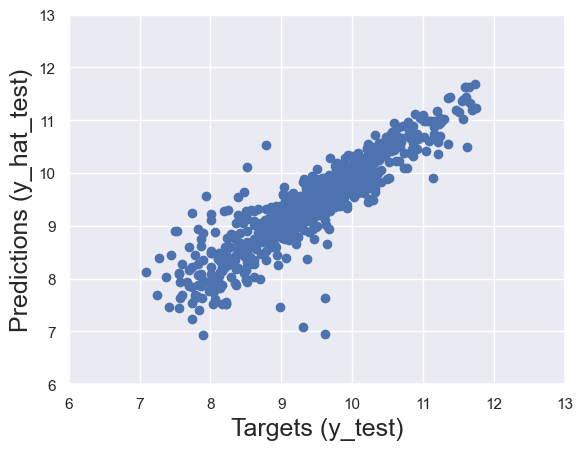

In [57]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# NB: the test is to see if a 45deg line can fit the data

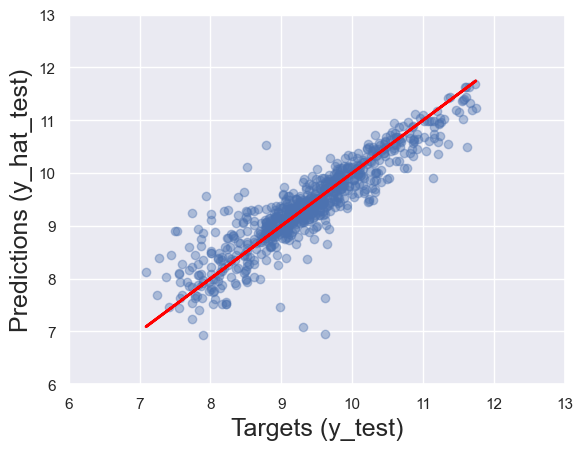

In [58]:
plt.scatter(y_test, y_hat_test, alpha=0.4)
fig = plt.plot(y_test, y_test, lw=2, c='red', label='regression line') #45 deg line
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# NB: the test is to see if a 45deg line can fit the data

In [59]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf

,Predictions
0,9.252563e+00
1,4.399682e+14
2,8.285400e+00
3,8.868164e+00
4,9.344116e+00
...,...
769,1.048621e+01
770,9.062012e+00
771,9.533325e+00
772,9.908936e+00


exp(ln(x))=|x|

log(exp(x)) = x
, if we take the exponentials of the log prices we will reach the original prices. and the easiest way to achieve that is through the np.exp(x) method

In [60]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf

C:\Users\tangu\AppData\Local\Temp\ipykernel_6244\1350318708.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])


,Predictions
0,1.043127e+04
1,inf
2,3.965552e+03
3,7.102230e+03
4,1.143137e+04
...,...
769,3.581801e+04
770,8.621477e+03
771,1.381244e+04
772,2.010926e+04


In [61]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,1.043127e+04,NaN
1,inf,7900.0
2,3.965552e+03,NaN
3,7.102230e+03,NaN
4,1.143137e+04,NaN
...,...,...
769,3.581801e+04,6950.0
770,8.621477e+03,NaN
771,1.381244e+04,NaN
772,2.010926e+04,NaN


In [62]:
# The missing values is as a result of unmatched indexes, we resolve it by resetting the indexes of y_test
y_test = y_test.reset_index(drop=True)
y_test.head()


0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [63]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,1.043127e+04,2300.0
1,inf,2800.0
2,3.965552e+03,2500.0
3,7.102230e+03,6400.0
4,1.143137e+04,9150.0
...,...,...
769,3.581801e+04,29500.0
770,8.621477e+03,9600.0
771,1.381244e+04,18300.0
772,2.010926e+04,68500.0


In [64]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [65]:
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Target'])*100
df_pf

,Predictions,Target,Residual,Difference %
0,1.043127e+04,2300.0,-8.131272e+03,353.533556
1,inf,2800.0,-inf,inf
2,3.965552e+03,2500.0,-1.465552e+03,58.622088
3,7.102230e+03,6400.0,-7.022297e+02,10.972340
4,1.143137e+04,9150.0,-2.281365e+03,24.932956
...,...,...,...,...
769,3.581801e+04,29500.0,-6.318008e+03,21.416975
770,8.621477e+03,9600.0,9.785228e+02,10.192946
771,1.381244e+04,18300.0,4.487556e+03,24.522165
772,2.010926e+04,68500.0,4.839074e+04,70.643420


In [66]:
df_pf.describe()

,Predictions,Target,Residual,Difference %
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,18165.817106,-inf,inf
std,NaN,19967.858908,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.052390
25%,7.233473e+03,6900.000000,-2.090595e+03,8.765679
50%,1.151610e+04,11600.000000,7.122324e+01,19.487908
75%,2.044759e+04,20500.000000,2.156595e+03,36.159867
max,inf,126000.000000,7.586580e+04,inf


In [67]:
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Difference %
373,8.303348e+03,8299.0,-4.347805,0.052390
493,5.001925e+03,4999.0,-2.925038,0.058512
716,1.351556e+04,13500.0,-15.557113,0.115238
52,9.814836e+03,9800.0,-14.835933,0.151387
714,2.296269e+04,22999.0,36.310627,0.157879
...,...,...,...,...
264,inf,42000.0,-inf,inf
366,inf,6999.0,-inf,inf
371,inf,6800.0,-inf,inf
536,inf,6000.0,-inf,inf


In [68]:
pd.options.display.max_rows = 900
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Difference %
373,8303.35,8299.00,-4.35,0.05
493,5001.93,4999.00,-2.93,0.06
716,13515.56,13500.00,-15.56,0.12
52,9814.84,9800.00,-14.84,0.15
714,22962.69,22999.00,36.31,0.16
692,6785.27,6799.00,13.73,0.20
740,6237.17,6250.00,12.83,0.21
139,11525.24,11500.00,-25.24,0.22
400,31191.48,31310.00,118.52,0.38
581,3377.04,3390.00,12.96,0.38


### How to impove our model
1. use a different se tof variables
2. Remove a bigger part of th outliers
3. Use different kinds of transformations